# JanataHack - E-Commerce Analytics ML Hackathon

Gender Prediction for E-Commerce
With the evolution of the information and communication technologies and the rapid growth of the Internet for the exchange and distribution of information, Electronic Commerce (e-commerce) has gained massive momentum globally, and attracted more and more worldwide users overcoming the time constraints and distance barriers.

It is important to gain in-depth insights into e-commerce via data-driven analytics and identify the factors affecting product sales, the impact of characteristics of customers on their purchase habits.

It is quite useful to understand the demand, habits, concern, perception, and interest of customers from the clue of genders for e-commerce companies. 

However, the genders of users are in general unavailable in e-commerce platforms. To address this gap the aim here is to predict the gender of e-commerce’s participants from their product viewing records.



About Data Source:
PAKDD 2015 Conference


Product list contains list of products viewed by the user in the given session and it also contains the category, sub category, sub-sub category and the product all encoded and separated with a slash symbol. Each consecutive product is separated with a semicolon.

In [1050]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1051]:
train = pd.read_csv("train_8wry4cB.csv")
test = pd.read_csv("test_Yix80N0.csv")

In [1052]:
train.head()

session_id        startTime          endTime  \
0     u16159   15/12/14 18:11   15/12/14 18:12   
1     u10253   16/12/14 14:35   16/12/14 14:41   
2     u19037  1/12/2014 15:58  1/12/2014 15:58   
3     u14556    23/11/14 2:57    23/11/14 3:00   
4     u24295   17/12/14 16:44   17/12/14 16:46   

                                         ProductList  gender  
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female  
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male  
2                       A00002/B00001/C00020/D16944/  female  
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female  
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male

In [1053]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 5 columns):
session_id     10500 non-null object
startTime      10500 non-null object
endTime        10500 non-null object
ProductList    10500 non-null object
gender         10500 non-null object
dtypes: object(5)
memory usage: 410.3+ KB


In [1054]:
#missing values check
train.isnull().sum()

session_id     0
startTime      0
endTime        0
ProductList    0
gender         0
dtype: int64

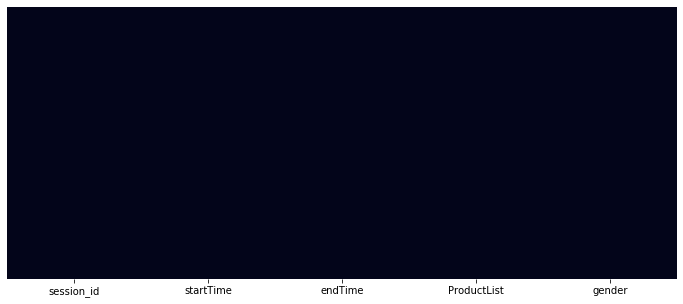

In [1055]:
plt.figure(figsize=(12,5))
sns.heatmap(data = train.isnull(), cbar=False, yticklabels=False)

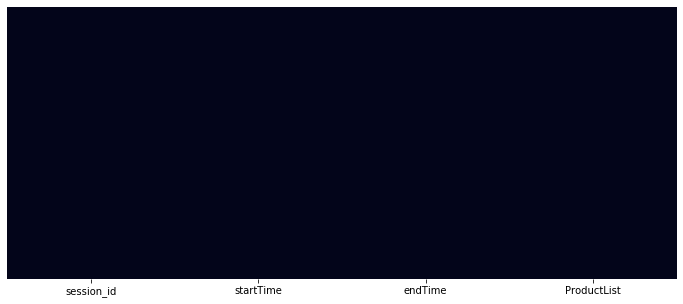

In [1056]:
plt.figure(figsize=(12,5))
sns.heatmap(data = test.isnull(), cbar=False, yticklabels=False)

No missing values available in our train data, so we can start data preprocessing

## Data preprocessing and Feature Extraction

In [1057]:
#reference
#ref: https://www.journaldev.com/23365/python-string-to-datetime-strptime
# https://stackoverflow.com/questions/22923775/calculate-pandas-dataframe-time-difference-between-two-columns-in-hours-and-minu


In [1058]:
#time difference caluculation
train["timeTakenSeconds"] = (pd.to_datetime(train["endTime"]) - pd.to_datetime(train["startTime"])).astype('timedelta64[s]')    
test["timeTakenSeconds"] = (pd.to_datetime(test["endTime"]) - pd.to_datetime(test["startTime"])).astype('timedelta64[s]')    

In [1059]:
#noofproducts calculation
train["noOfProducts"] = train.ProductList.str.count(";") + 1
test["noOfProducts"] = test.ProductList.str.count(";") + 1

In [1060]:
train["startDate"] = train["startTime"].str.extract(pat="(\d+\/\d+\/\d+)\s\d+\:\d+")
train["endDate"] = train["endTime"].str.extract(pat="(\d+\/\d+\/\d+)\s\d+\:\d+")

test["startDate"] = test["startTime"].str.extract(pat="(\d+\/\d+\/\d+)\s\d+\:\d+")
test["endDate"] = test["endTime"].str.extract(pat="(\d+\/\d+\/\d+)\s\d+\:\d+")

In [1061]:
train["startDate"].head()

0     15/12/14
1     16/12/14
2    1/12/2014
3     23/11/14
4     17/12/14
Name: startDate, dtype: object

In [1062]:
train["endDate"].head()

0     15/12/14
1     16/12/14
2    1/12/2014
3     23/11/14
4     17/12/14
Name: endDate, dtype: object

In [1063]:
train[train["startDate"] != train["endDate"]]

session_id         startTime          endTime  \
55        u20930   5/12/2014 15:35  9/12/2014 10:38   
62        u18364    25/11/14 14:49  1/12/2014 11:35   
64        u13611     15/11/14 9:12   18/11/14 14:16   
70        u18738    26/11/14 13:43    13/12/14 2:03   
256       u15001    16/11/14 23:34    16/12/14 4:35   
...          ...               ...              ...   
10022     u18822    26/11/14 14:56  1/12/2014 10:45   
10026     u24088    16/12/14 13:38   21/12/14 22:46   
10140     u14037    15/11/14 15:53  9/12/2014 10:45   
10178     u22578  12/12/2014 23:58    13/12/14 0:01   
10186     u17849     25/11/14 0:08   26/11/14 23:35   

                                             ProductList  gender  \
55     A00002/B00001/C00010/D18354/;A00003/B00012/C00...  female   
62     A00002/B00004/C00102/D11613/;A00002/B00001/C00...  female   
64     A00003/B00021/C00055/D02305/;A00002/B00001/C00...  female   
70     A00001/B00027/C00224/D12693/;A00001/B00031/C00...    male   
256    A00002/B00001/C00059/D04809/;A00002/B00017/C00...  female   
...                                                  ...     ...   
10022  A00002/B00004/C00018/D12828/;A00002/B00004/C00...  female   
10026  A00002/B00001/C00010/D26843/;A00001/B00001/C00...    male   
10140  A00002/B00004/C00018/D02946/;A00004/B00014/C00...  female   
10178  A00003/B00012/C00051/D17589/;A00003/B00012/C00...  female   
10186  A00002/B00006/C00015/D01564/;A00002/B00016/C00...  female   

       timeTakenSeconds  noOfProducts   startDate    endDate  
55           10609380.0             3   5/12/2014  9/12/2014  
62          -27400440.0             2    25/11/14  1/12/2014  
64             277440.0             2    15/11/14   18/11/14  
70            1426800.0             2    26/11/14   13/12/14  
256           2523660.0             3    16/11/14   16/12/14  
...                 ...           ...         ...        ...  
10022       -27490260.0             2    26/11/14  1/12/2014  
10026          464880.0             2    16/12/14   21/12/14  
10140        -5548080.0             2    15/11/14  9/12/2014  
10178             180.0             3  12/12/2014   13/12/14  
10186          170820.0             2    25/11/14   26/11/14  

[93 rows x 9 columns]

In [1064]:
train["startMonth"] = train["startTime"].str.extract(pat="\d+\/(\d+)\/\d+\s\d+\:\d+")
test["startMonth"] = test["startTime"].str.extract(pat="\d+\/(\d+)\/\d+\s\d+\:\d+")
#train["endMonth"] = train["endTime"].str.extract(pat="\d+\/(\d+)\/\d+\s\d+\:\d+")

In [1065]:
#train[train["startMonth"] != train["endMonth"]]

In [1066]:
#day table ==> monday
train["startDay"] = pd.DatetimeIndex(train['startDate']).strftime("%a")

#month name extraction
train["startMonth"] = pd.DatetimeIndex(train['startDate']).strftime("%b")

#meridiem extraction
train["startmeridiem"] = pd.DatetimeIndex(train['startTime']).strftime("%p")

#day table ==> monday
test["startDay"] = pd.DatetimeIndex(test['startDate']).strftime("%a")

#month name extraction
test["startMonth"] = pd.DatetimeIndex(test['startDate']).strftime("%b")

#meridiem extraction
test["startmeridiem"] = pd.DatetimeIndex(test['startTime']).strftime("%p")

In [1067]:
#hour extraction
train["startHour"] = pd.DatetimeIndex(train['startTime']).strftime("%H")

#hour extraction
train["startDayname"] = pd.DatetimeIndex(train['startTime']).strftime("%d")

#hour extraction
test["startHour"] = pd.DatetimeIndex(test['startTime']).strftime("%H")

#hour extraction
test["startDayname"] = pd.DatetimeIndex(test['startTime']).strftime("%d")

In [1068]:
print(train[train["timeTakenSeconds"] > 3600].info())
print(train[train["timeTakenSeconds"] < 0].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 55 to 10186
Data columns (total 14 columns):
session_id          115 non-null object
startTime           115 non-null object
endTime             115 non-null object
ProductList         115 non-null object
gender              115 non-null object
timeTakenSeconds    115 non-null float64
noOfProducts        115 non-null int64
startDate           115 non-null object
endDate             115 non-null object
startMonth          115 non-null object
startDay            115 non-null object
startmeridiem       115 non-null object
startHour           115 non-null object
startDayname        115 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage: 13.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 62 to 10140
Data columns (total 14 columns):
session_id          16 non-null object
startTime           16 non-null object
endTime             16 non-null object
ProductList         16 non-null object


In [1069]:
train.head()

session_id        startTime          endTime  \
0     u16159   15/12/14 18:11   15/12/14 18:12   
1     u10253   16/12/14 14:35   16/12/14 14:41   
2     u19037  1/12/2014 15:58  1/12/2014 15:58   
3     u14556    23/11/14 2:57    23/11/14 3:00   
4     u24295   17/12/14 16:44   17/12/14 16:46   

                                         ProductList  gender  \
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female   
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male   
2                       A00002/B00001/C00020/D16944/  female   
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female   
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male   

   timeTakenSeconds  noOfProducts  startDate    endDate startMonth startDay  \
0              60.0             4   15/12/14   15/12/14        Dec      Mon   
1             360.0             7   16/12/14   16/12/14        Dec      Tue   
2               0.0             1  1/12/2014  1/12/2014        Jan      Sun   
3             180.0             3   23/11/14   23/11/14        Nov      Sun   
4             120.0             2   17/12/14   17/12/14        Dec      Wed   

  startmeridiem startHour startDayname  
0            PM        18           15  
1            PM        14           16  
2            PM        15           12  
3            AM        02           23  
4            PM        16           17

In [1070]:
train["startHour"].value_counts()

10    800
15    792
14    779
09    748
11    741
20    717
13    706
16    670
21    633
12    606
08    554
22    524
19    492
17    375
18    360
23    333
07    236
00    148
06     75
01     67
05     47
02     36
03     31
04     30
Name: startHour, dtype: int64

In [1071]:
train["categoryA1"] = train["ProductList"].str.extract(pat="(A00001)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA2"] = train["ProductList"].str.extract(pat="(A00002)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA3"] = train["ProductList"].str.extract(pat="(A00003)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA4"] = train["ProductList"].str.extract(pat="(A00004)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA5"] = train["ProductList"].str.extract(pat="(A00005)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA6"] = train["ProductList"].str.extract(pat="(A00006)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA7"] = train["ProductList"].str.extract(pat="(A00007)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA8"] = train["ProductList"].str.extract(pat="(A00008)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA9"] = train["ProductList"].str.extract(pat="(A00009)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA10"] = train["ProductList"].str.extract(pat="(A00010)\/B\d+\/C\d+\/D\d+\/;?")
train["categoryA11"] = train["ProductList"].str.extract(pat="(A00011)\/B\d+\/C\d+\/D\d+\/;?")

test["categoryA1"] = test["ProductList"].str.extract(pat="(A00001)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA2"] = test["ProductList"].str.extract(pat="(A00002)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA3"] = test["ProductList"].str.extract(pat="(A00003)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA4"] = test["ProductList"].str.extract(pat="(A00004)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA5"] = test["ProductList"].str.extract(pat="(A00005)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA6"] = test["ProductList"].str.extract(pat="(A00006)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA7"] = test["ProductList"].str.extract(pat="(A00007)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA8"] = test["ProductList"].str.extract(pat="(A00008)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA9"] = test["ProductList"].str.extract(pat="(A00009)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA10"] = test["ProductList"].str.extract(pat="(A00010)\/B\d+\/C\d+\/D\d+\/;?")
test["categoryA11"] = test["ProductList"].str.extract(pat="(A00011)\/B\d+\/C\d+\/D\d+\/;?")

In [1072]:
train["categoryD1"] = train["ProductList"].str.extract(r'.*(D0[012]\d\d\d).*')
train["categoryD2"] = train["ProductList"].str.extract(r'.*(D0[345]\d\d\d).*')
train["categoryD3"] = train["ProductList"].str.extract(r'.*(D0[6789]\d\d\d).*')
train["categoryD4"] = train["ProductList"].str.extract(r'.*(D1[012]\d\d\d).*')
train["categoryD5"] = train["ProductList"].str.extract(r'.*(D1[345]\d\d\d).*')
train["categoryD6"] = train["ProductList"].str.extract(r'.*(D1[6789]\d\d\d).*')
train["categoryD7"] = train["ProductList"].str.extract(r'.*(D2[012]\d\d\d).*')
train["categoryD8"] = train["ProductList"].str.extract(r'.*(D2[345]\d\d\d).*')
train["categoryD9"] = train["ProductList"].str.extract(r'.*(D2[6789]\d\d\d).*')
train["categoryD10"] = train["ProductList"].str.extract(r'.*(D3[012]\d\d\d).*')
train["categoryD11"] = train["ProductList"].str.extract(r'.*(D3[345]\d\d\d).*')
train["categoryD12"] = train["ProductList"].str.extract(r'.*(D3[6789]\d\d\d).*')

test["categoryD1"] = test["ProductList"].str.extract(r'.*(D0[012]\d\d\d).*')
test["categoryD2"] = test["ProductList"].str.extract(r'.*(D0[345]\d\d\d).*')
test["categoryD3"] = test["ProductList"].str.extract(r'.*(D0[6789]\d\d\d).*')
test["categoryD4"] = test["ProductList"].str.extract(r'.*(D1[012]\d\d\d).*')
test["categoryD5"] = test["ProductList"].str.extract(r'.*(D1[345]\d\d\d).*')
test["categoryD6"] = test["ProductList"].str.extract(r'.*(D1[6789]\d\d\d).*')
test["categoryD7"] = test["ProductList"].str.extract(r'.*(D2[012]\d\d\d).*')
test["categoryD8"] = test["ProductList"].str.extract(r'.*(D2[345]\d\d\d).*')
test["categoryD9"] = test["ProductList"].str.extract(r'.*(D2[6789]\d\d\d).*')
test["categoryD10"] = test["ProductList"].str.extract(r'.*(D3[012]\d\d\d).*')
test["categoryD11"] = test["ProductList"].str.extract(r'.*(D3[345]\d\d\d).*')
test["categoryD12"] = test["ProductList"].str.extract(r'.*(D3[6789]\d\d\d).*')

In [1073]:
train.head()

session_id        startTime          endTime  \
0     u16159   15/12/14 18:11   15/12/14 18:12   
1     u10253   16/12/14 14:35   16/12/14 14:41   
2     u19037  1/12/2014 15:58  1/12/2014 15:58   
3     u14556    23/11/14 2:57    23/11/14 3:00   
4     u24295   17/12/14 16:44   17/12/14 16:46   

                                         ProductList  gender  \
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female   
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male   
2                       A00002/B00001/C00020/D16944/  female   
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female   
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male   

   timeTakenSeconds  noOfProducts  startDate    endDate startMonth  ...  \
0              60.0             4   15/12/14   15/12/14        Dec  ...   
1             360.0             7   16/12/14   16/12/14        Dec  ...   
2               0.0             1  1/12/2014  1/12/2014        Jan  ...   
3             180.0             3   23/11/14   23/11/14        Nov  ...   
4             120.0             2   17/12/14   17/12/14        Dec  ...   

  categoryD3 categoryD4 categoryD5 categoryD6 categoryD7 categoryD8  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN     D25444   
2        NaN        NaN        NaN     D16944        NaN        NaN   
3        NaN     D10286        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  categoryD9 categoryD10 categoryD11 categoryD12  
0     D28437         NaN         NaN         NaN  
1     D29418         NaN         NaN         NaN  
2        NaN         NaN         NaN         NaN  
3        NaN         NaN         NaN         NaN  
4        NaN      D30806         NaN         NaN  

[5 rows x 37 columns]

In [1074]:
train = train.fillna(0)

test = test.fillna(0)

In [1075]:
train["categoryA11"].value_counts()

0         10446
A00011       54
Name: categoryA11, dtype: int64

In [1076]:
train.head()

session_id        startTime          endTime  \
0     u16159   15/12/14 18:11   15/12/14 18:12   
1     u10253   16/12/14 14:35   16/12/14 14:41   
2     u19037  1/12/2014 15:58  1/12/2014 15:58   
3     u14556    23/11/14 2:57    23/11/14 3:00   
4     u24295   17/12/14 16:44   17/12/14 16:46   

                                         ProductList  gender  \
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female   
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male   
2                       A00002/B00001/C00020/D16944/  female   
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female   
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male   

   timeTakenSeconds  noOfProducts  startDate    endDate startMonth  ...  \
0              60.0             4   15/12/14   15/12/14        Dec  ...   
1             360.0             7   16/12/14   16/12/14        Dec  ...   
2               0.0             1  1/12/2014  1/12/2014        Jan  ...   
3             180.0             3   23/11/14   23/11/14        Nov  ...   
4             120.0             2   17/12/14   17/12/14        Dec  ...   

  categoryD3 categoryD4 categoryD5 categoryD6 categoryD7 categoryD8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0     D25444   
2          0          0          0     D16944          0          0   
3          0     D10286          0          0          0          0   
4          0          0          0          0          0          0   

  categoryD9 categoryD10 categoryD11 categoryD12  
0     D28437           0           0           0  
1     D29418           0           0           0  
2          0           0           0           0  
3          0           0           0           0  
4          0      D30806           0           0  

[5 rows x 37 columns]

In [1077]:
test.head()

session_id       startTime         endTime  \
0     u12112  08/12/14 13:36  08/12/14 13:36   
1     u19725  19/12/14 13:52  19/12/14 13:52   
2     u11795  01/12/14 10:44  01/12/14 10:44   
3     u22639  08/12/14 20:19  08/12/14 20:22   
4     u18034  15/12/14 19:33  15/12/14 19:33   

                                         ProductList  timeTakenSeconds  \
0                       A00002/B00003/C00006/D19956/               0.0   
1                       A00002/B00005/C00067/D02026/               0.0   
2                       A00002/B00002/C00004/D12538/               0.0   
3  A00002/B00003/C00079/D22781/;A00002/B00003/C00...             180.0   
4                       A00002/B00001/C00010/D23419/               0.0   

   noOfProducts startDate   endDate startMonth startDay  ... categoryD3  \
0             1  08/12/14  08/12/14        Aug      Tue  ...          0   
1             1  19/12/14  19/12/14        Dec      Fri  ...          0   
2             1  01/12/14  01/12/14        Jan      Sun  ...          0   
3             4  08/12/14  08/12/14        Aug      Tue  ...          0   
4             1  15/12/14  15/12/14        Dec      Mon  ...          0   

  categoryD4 categoryD5 categoryD6 categoryD7 categoryD8 categoryD9  \
0          0          0     D19956          0          0          0   
1          0          0          0          0          0          0   
2     D12538          0          0          0          0          0   
3          0          0     D19325     D22786          0          0   
4          0          0          0          0     D23419          0   

  categoryD10 categoryD11 categoryD12  
0           0           0           0  
1           0           0           0  
2           0           0           0  
3           0           0           0  
4           0           0           0  

[5 rows x 36 columns]

In [1078]:
#train = train.drop(columns=["categoryA"])

timing ===> am or pm

timing ===> 3 hours interval

week number (week 1 week 2 week 3 week 4 ...)


### some clues for new features

A ==> feature extraction base on only A

time difference between start and end time 
    timestamp conversion and difference
    categories short, medium, long based on EDA
    outlier removal based on negative time difference (negative values impossible)
 
no of products (based on ; delimiter)

week end / week day 

am pm or night time or time block interval (10 pm to 2 am ) like that

AB combined product list

AB combinations

D product

## Exploratory Data Analysis  (EDA)

In [1079]:
train.head()

session_id        startTime          endTime  \
0     u16159   15/12/14 18:11   15/12/14 18:12   
1     u10253   16/12/14 14:35   16/12/14 14:41   
2     u19037  1/12/2014 15:58  1/12/2014 15:58   
3     u14556    23/11/14 2:57    23/11/14 3:00   
4     u24295   17/12/14 16:44   17/12/14 16:46   

                                         ProductList  gender  \
0  A00002/B00003/C00006/D28435/;A00002/B00003/C00...  female   
1  A00001/B00009/C00031/D29404/;A00001/B00009/C00...    male   
2                       A00002/B00001/C00020/D16944/  female   
3  A00002/B00004/C00018/D10284/;A00002/B00004/C00...  female   
4  A00001/B00001/C00012/D30805/;A00001/B00001/C00...    male   

   timeTakenSeconds  noOfProducts  startDate    endDate startMonth  ...  \
0              60.0             4   15/12/14   15/12/14        Dec  ...   
1             360.0             7   16/12/14   16/12/14        Dec  ...   
2               0.0             1  1/12/2014  1/12/2014        Jan  ...   
3             180.0             3   23/11/14   23/11/14        Nov  ...   
4             120.0             2   17/12/14   17/12/14        Dec  ...   

  categoryD3 categoryD4 categoryD5 categoryD6 categoryD7 categoryD8  \
0          0          0          0          0          0          0   
1          0          0          0          0          0     D25444   
2          0          0          0     D16944          0          0   
3          0     D10286          0          0          0          0   
4          0          0          0          0          0          0   

  categoryD9 categoryD10 categoryD11 categoryD12  
0     D28437           0           0           0  
1     D29418           0           0           0  
2          0           0           0           0  
3          0           0           0           0  
4          0      D30806           0           0  

[5 rows x 37 columns]

In [1080]:
train.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'timeTakenSeconds', 'noOfProducts', 'startDate', 'endDate',
       'startMonth', 'startDay', 'startmeridiem', 'startHour', 'startDayname',
       'categoryA1', 'categoryA2', 'categoryA3', 'categoryA4', 'categoryA5',
       'categoryA6', 'categoryA7', 'categoryA8', 'categoryA9', 'categoryA10',
       'categoryA11', 'categoryD1', 'categoryD2', 'categoryD3', 'categoryD4',
       'categoryD5', 'categoryD6', 'categoryD7', 'categoryD8', 'categoryD9',
       'categoryD10', 'categoryD11', 'categoryD12'],
      dtype='object')

### Univariate Analysis

In [1081]:
#boxplot
def boxplot(col):
    plt.figure(figsize=(8,8))
    sns.boxplot(y=col, data=train)

In [1082]:
#catplot
def catplot(col):
    plt.figure(figsize=(15,15))
    sns.countplot(x=col,data=train)

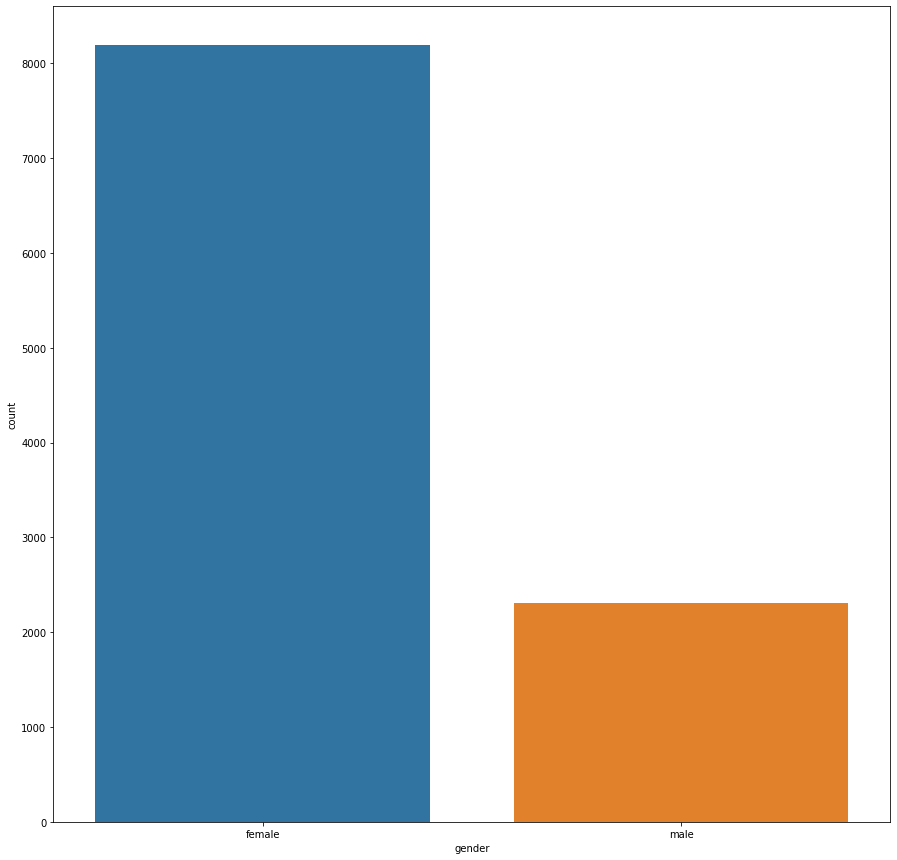

In [1083]:
catplot("gender")

Data is imbalanced and its biased towards female popualtion with 4:1 ratio, so data balancing required before modeling.

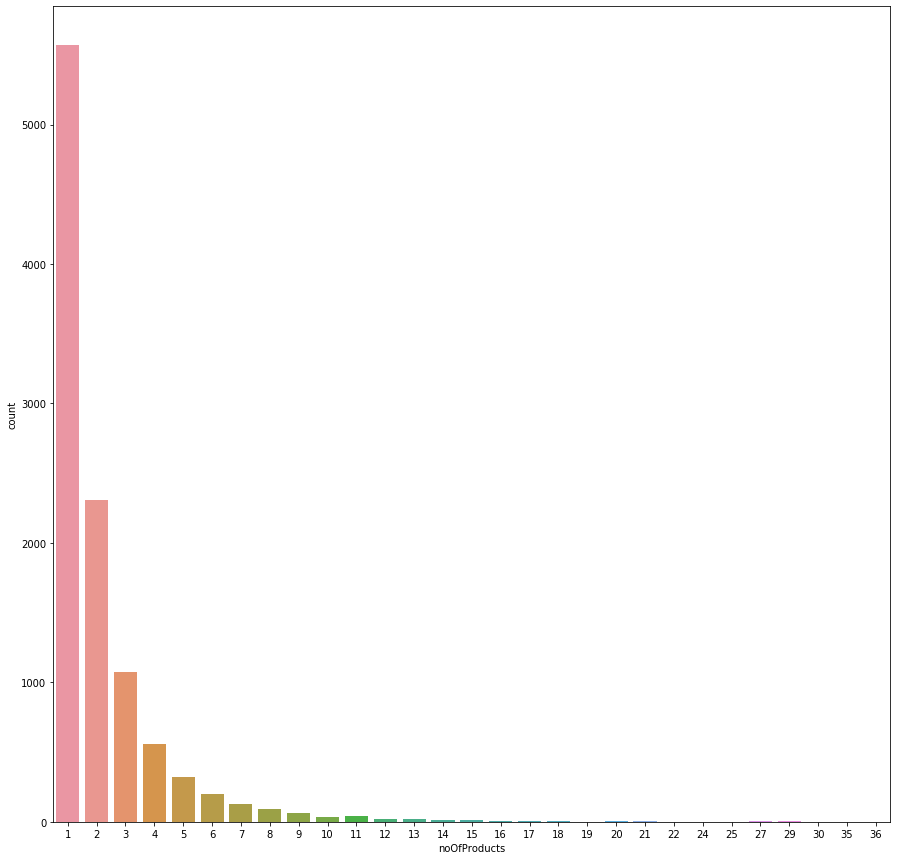

In [1084]:
catplot("noOfProducts")

More that 55 % population accessed only one product and more than 80% popluation accessed less than 3 products.

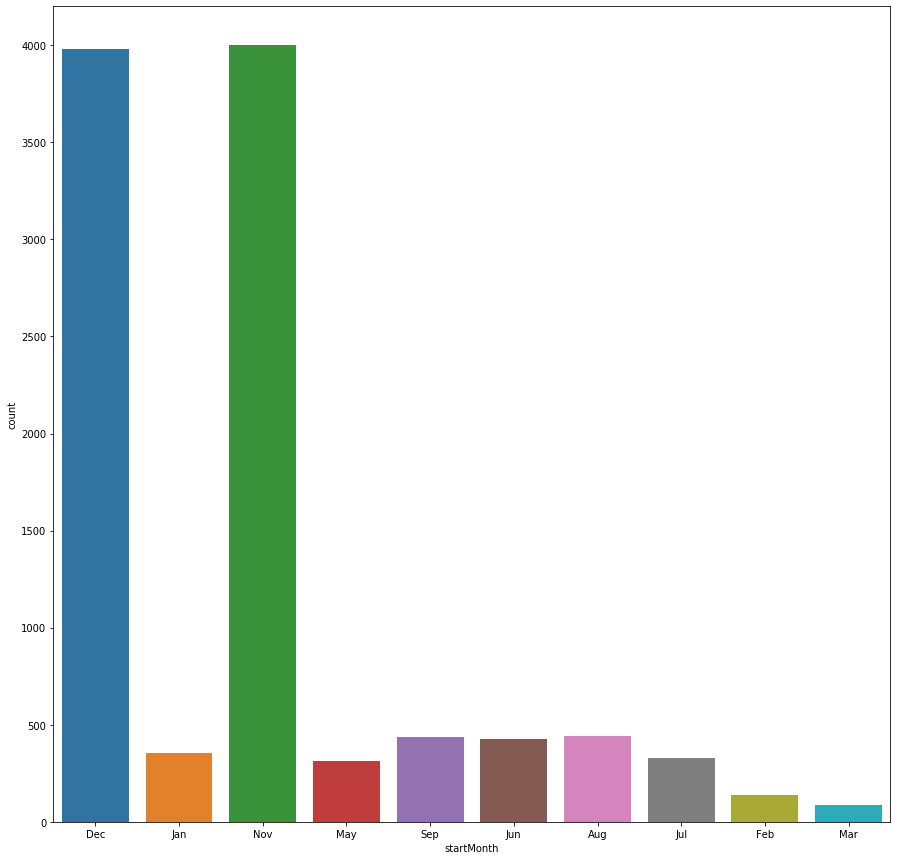

In [1085]:
catplot("startMonth")

No of product cliques touched its peak during november and december, which is almost 80% of the total clique. Others months have equal priority in the remaining percent.

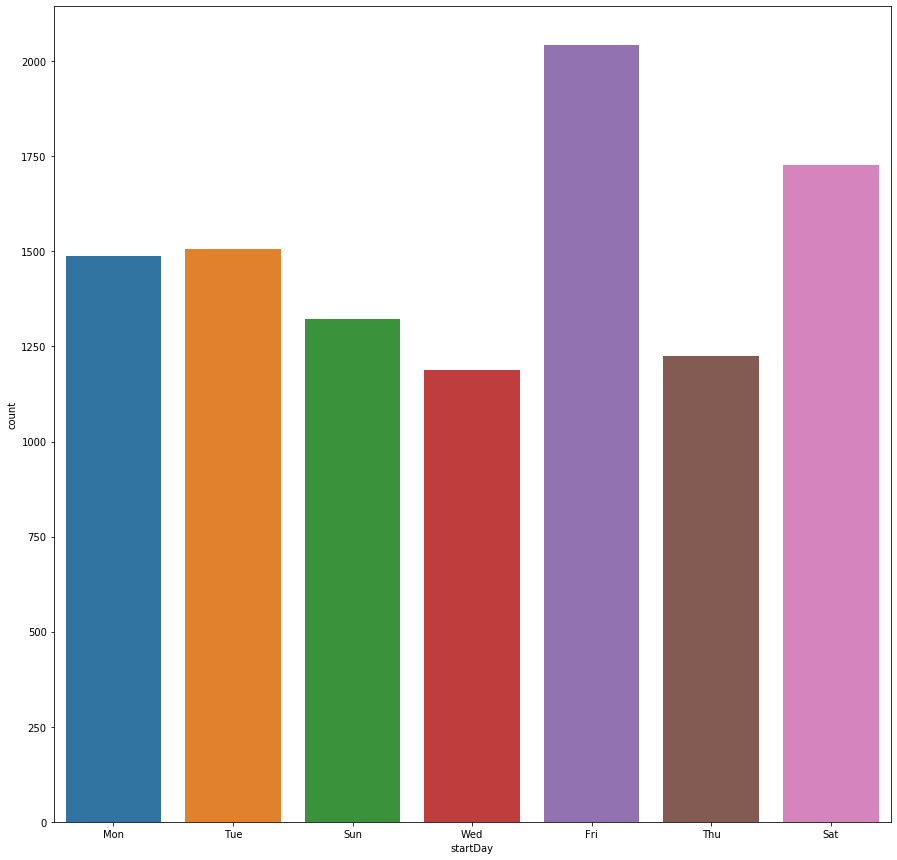

In [1086]:
catplot("startDay")

Generally no of cliques are more during friday and saturday.
And its less during wednesday.

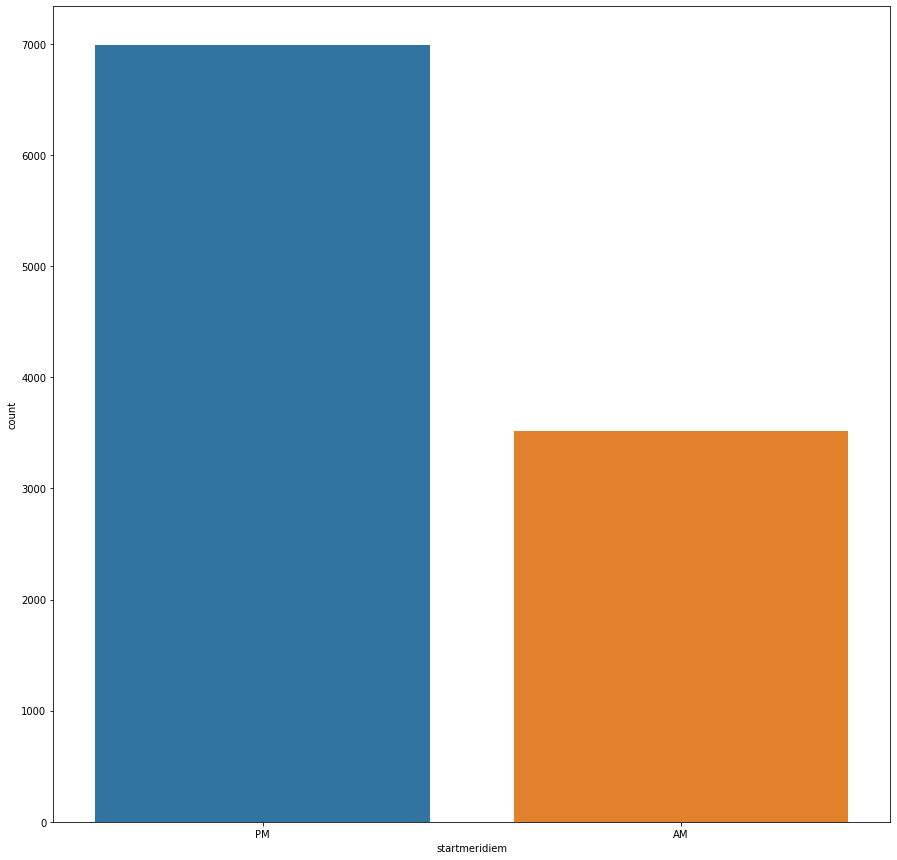

In [1087]:
catplot("startmeridiem")

No of cliques are more during PM than AM, as expected

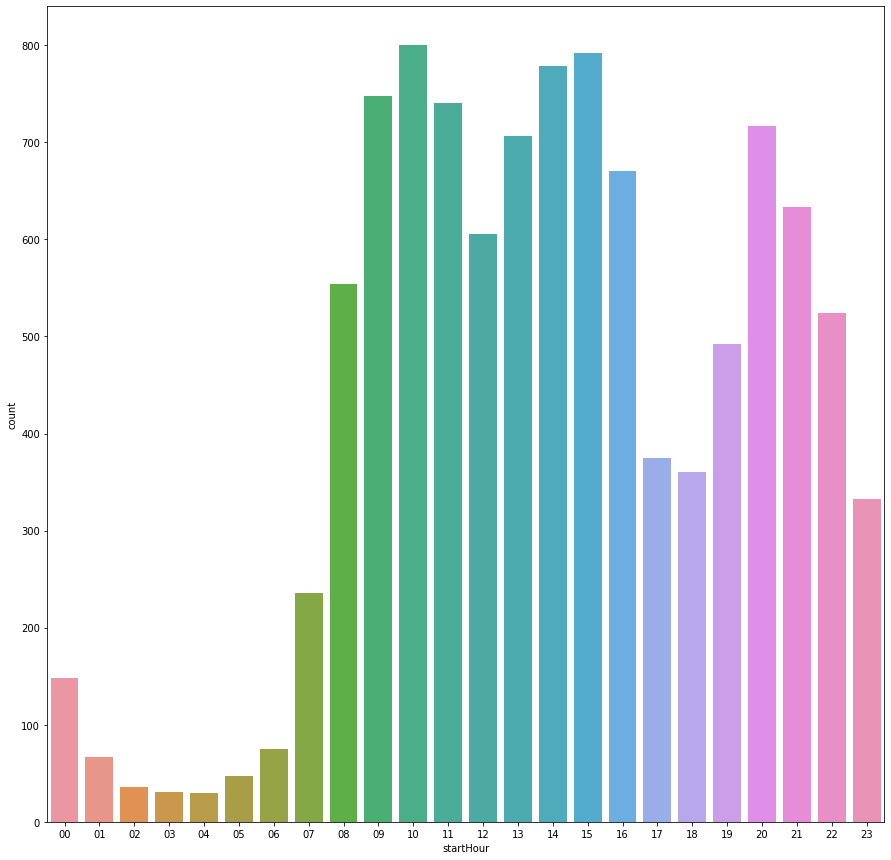

In [1088]:
catplot("startHour")

09 to 15 ===> heavy peak
18 to 24 ===> peak 
00 to 06 ===> very low

No of cliques are more during some specific intervals and very low during 00 to 06


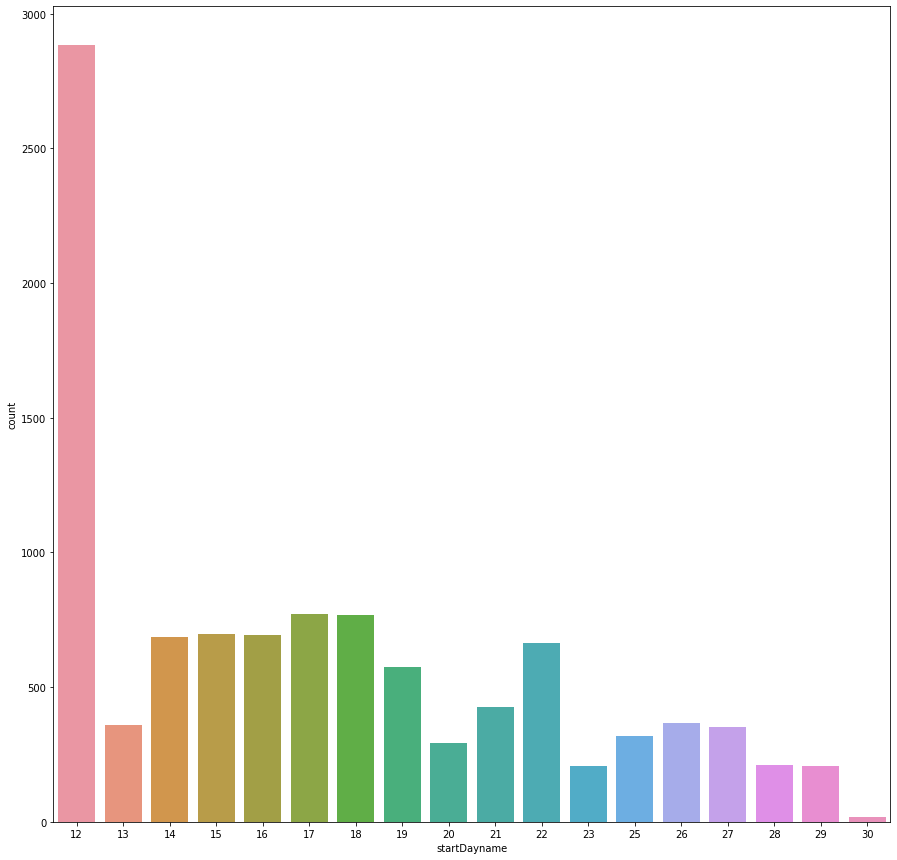

In [1089]:
catplot("startDayname")

More cliques during starting days and towards end its decreasing

In [1090]:
def distplot(col):
    plt.figure(figsize=(8,8))
    sns.distplot(train[col],kde=True)

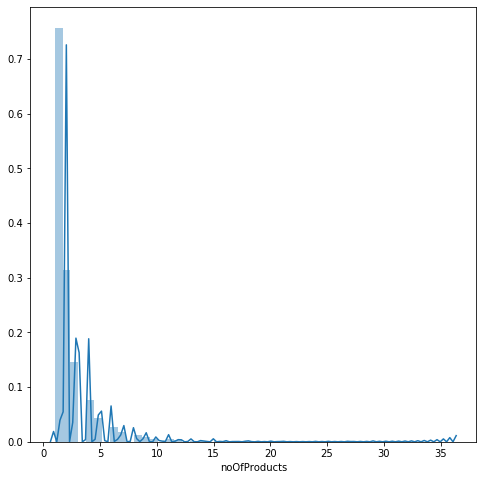

In [1091]:
distplot("noOfProducts")

### Bivariate Analysis

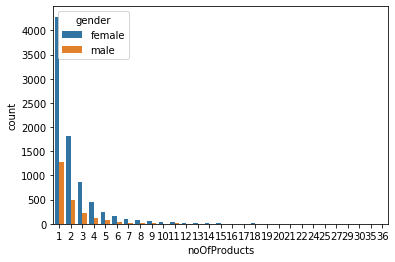

In [1092]:
sns.countplot(x = train["noOfProducts"], hue=train["gender"])

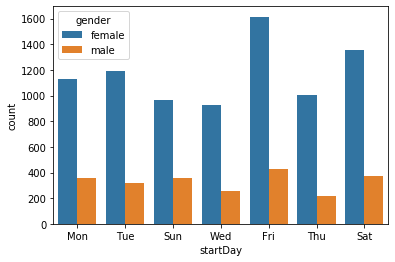

In [1093]:
sns.countplot(x = train["startDay"], hue=train["gender"])

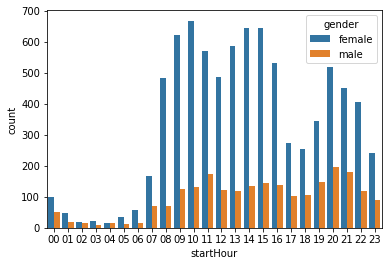

In [1094]:
sns.countplot(x = train["startHour"], hue=train["gender"])

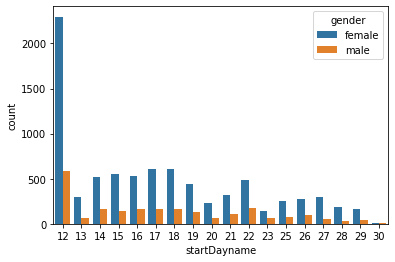

In [1095]:
sns.countplot(x = train["startDayname"], hue=train["gender"])

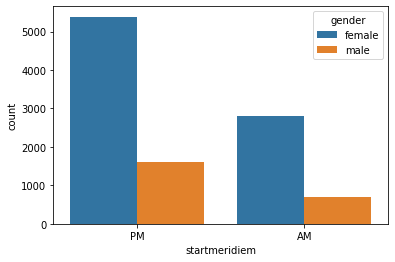

In [1096]:
sns.countplot(x = train["startmeridiem"], hue=train["gender"])

<Figure size 360x360 with 0 Axes>

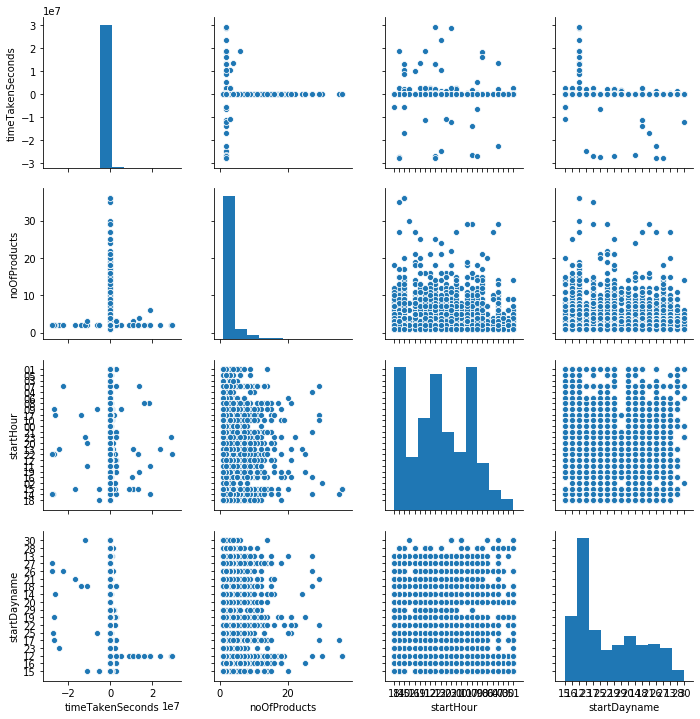

In [1097]:
plt.figure(figsize=(5,5))
sns.pairplot(data=train)

## Feature Englineering

In [1098]:
train_eda = train.copy()
test_eda = test.copy()

In [1099]:
train_eda.columns

Index(['session_id', 'startTime', 'endTime', 'ProductList', 'gender',
       'timeTakenSeconds', 'noOfProducts', 'startDate', 'endDate',
       'startMonth', 'startDay', 'startmeridiem', 'startHour', 'startDayname',
       'categoryA1', 'categoryA2', 'categoryA3', 'categoryA4', 'categoryA5',
       'categoryA6', 'categoryA7', 'categoryA8', 'categoryA9', 'categoryA10',
       'categoryA11', 'categoryD1', 'categoryD2', 'categoryD3', 'categoryD4',
       'categoryD5', 'categoryD6', 'categoryD7', 'categoryD8', 'categoryD9',
       'categoryD10', 'categoryD11', 'categoryD12'],
      dtype='object')

In [1100]:
train_eda = train_eda.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList','startDate','endDate'])
test_eda = test_eda.drop(columns=['session_id', 'startTime', 'endTime', 'ProductList','startDate','endDate'])

In [1101]:
train_eda.head()

gender  timeTakenSeconds  noOfProducts startMonth startDay startmeridiem  \
0  female              60.0             4        Dec      Mon            PM   
1    male             360.0             7        Dec      Tue            PM   
2  female               0.0             1        Jan      Sun            PM   
3  female             180.0             3        Nov      Sun            AM   
4    male             120.0             2        Dec      Wed            PM   

  startHour startDayname categoryA1 categoryA2  ... categoryD3 categoryD4  \
0        18           15          0     A00002  ...          0          0   
1        14           16     A00001          0  ...          0          0   
2        15           12          0     A00002  ...          0          0   
3        02           23          0     A00002  ...          0     D10286   
4        16           17     A00001          0  ...          0          0   

  categoryD5 categoryD6 categoryD7 categoryD8 categoryD9 categoryD10  \
0          0          0          0          0     D28437           0   
1          0          0          0     D25444     D29418           0   
2          0     D16944          0          0          0           0   
3          0          0          0          0          0           0   
4          0          0          0          0          0      D30806   

  categoryD11 categoryD12  
0           0           0  
1           0           0  
2           0           0  
3           0           0  
4           0           0  

[5 rows x 31 columns]

In [1102]:
train_eda['categoryA1'] = train_eda['categoryA1'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA2'] = train_eda['categoryA2'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA3'] = train_eda['categoryA3'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA4'] = train_eda['categoryA4'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA5'] = train_eda['categoryA5'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA6'] = train_eda['categoryA6'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA7'] = train_eda['categoryA7'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA8'] = train_eda['categoryA8'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA9'] = train_eda['categoryA9'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA10'] = train_eda['categoryA10'].apply(lambda data : 0 if(data==0) else 1)
train_eda['categoryA11'] = train_eda['categoryA11'].apply(lambda data : 0 if(data==0) else 1)


test_eda['categoryA1'] = test_eda['categoryA1'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA2'] = test_eda['categoryA2'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA3'] = test_eda['categoryA3'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA4'] = test_eda['categoryA4'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA5'] = test_eda['categoryA5'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA6'] = test_eda['categoryA6'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA7'] = test_eda['categoryA7'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA8'] = test_eda['categoryA8'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA9'] = test_eda['categoryA9'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA10'] = test_eda['categoryA10'].apply(lambda data : 0 if(data==0) else 1)
test_eda['categoryA11'] = test_eda['categoryA11'].apply(lambda data : 0 if(data==0) else 1)

In [1103]:
train_eda['categoryD1'] = train_eda['categoryD1'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD2'] = train_eda['categoryD2'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD3'] = train_eda['categoryD3'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD4'] = train_eda['categoryD4'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD5'] = train_eda['categoryD5'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD6'] = train_eda['categoryD6'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD7'] = train_eda['categoryD7'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD8'] = train_eda['categoryD8'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD9'] = train_eda['categoryD9'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD10'] = train_eda['categoryD10'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD11'] = train_eda['categoryD11'].apply(lambda data : 1 if(data!=0) else 0)
train_eda['categoryD12'] = train_eda['categoryD12'].apply(lambda data : 1 if(data!=0) else 0)

test_eda['categoryD1'] = test_eda['categoryD1'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD2'] = test_eda['categoryD2'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD3'] = test_eda['categoryD3'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD4'] = test_eda['categoryD4'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD5'] = test_eda['categoryD5'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD6'] = test_eda['categoryD6'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD7'] = test_eda['categoryD7'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD8'] = test_eda['categoryD8'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD9'] = test_eda['categoryD9'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD10'] = test_eda['categoryD10'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD11'] = test_eda['categoryD11'].apply(lambda data : 1 if(data!=0) else 0)
test_eda['categoryD12'] = test_eda['categoryD12'].apply(lambda data : 1 if(data!=0) else 0)

In [1104]:
train_eda.head()

gender  timeTakenSeconds  noOfProducts startMonth startDay startmeridiem  \
0  female              60.0             4        Dec      Mon            PM   
1    male             360.0             7        Dec      Tue            PM   
2  female               0.0             1        Jan      Sun            PM   
3  female             180.0             3        Nov      Sun            AM   
4    male             120.0             2        Dec      Wed            PM   

  startHour startDayname  categoryA1  categoryA2  ...  categoryD3  categoryD4  \
0        18           15           0           1  ...           0           0   
1        14           16           1           0  ...           0           0   
2        15           12           0           1  ...           0           0   
3        02           23           0           1  ...           0           1   
4        16           17           1           0  ...           0           0   

   categoryD5  categoryD6  categoryD7  categoryD8  categoryD9  categoryD10  \
0           0           0           0           0           1            0   
1           0           0           0           1           1            0   
2           0           1           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            1   

   categoryD11  categoryD12  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 31 columns]

In [1105]:
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 31 columns):
gender              10500 non-null object
timeTakenSeconds    10500 non-null float64
noOfProducts        10500 non-null int64
startMonth          10500 non-null object
startDay            10500 non-null object
startmeridiem       10500 non-null object
startHour           10500 non-null object
startDayname        10500 non-null object
categoryA1          10500 non-null int64
categoryA2          10500 non-null int64
categoryA3          10500 non-null int64
categoryA4          10500 non-null int64
categoryA5          10500 non-null int64
categoryA6          10500 non-null int64
categoryA7          10500 non-null int64
categoryA8          10500 non-null int64
categoryA9          10500 non-null int64
categoryA10         10500 non-null int64
categoryA11         10500 non-null int64
categoryD1          10500 non-null int64
categoryD2          10500 non-null int64
categoryD3          10

In [1106]:
train_eda_startMonth = pd.get_dummies(data=train_eda['startMonth'], prefix='startMonth', drop_first=True)
test_eda_startMonth = pd.get_dummies(data=test_eda['startMonth'], prefix='startMonth', drop_first=True)

In [1107]:
train_eda = pd.concat([train_eda,train_eda_startMonth],axis=1)
test_eda = pd.concat([test_eda,test_eda_startMonth],axis=1)

In [1108]:
train_eda_startDay = pd.get_dummies(data=train_eda['startDay'], prefix='startDay', drop_first=True)
train_eda = pd.concat([train_eda,train_eda_startDay],axis=1)

test_eda_startDay = pd.get_dummies(data=test_eda['startDay'], prefix='startDay', drop_first=True)
test_eda = pd.concat([test_eda,test_eda_startDay],axis=1)

In [1109]:
train_eda_startmeridiem = pd.get_dummies(data=train_eda['startmeridiem'], prefix='startmeridiem', drop_first=True)
train_eda = pd.concat([train_eda,train_eda_startmeridiem],axis=1)

test_eda_startmeridiem = pd.get_dummies(data=test_eda['startmeridiem'], prefix='startmeridiem', drop_first=True)
test_eda = pd.concat([test_eda,test_eda_startmeridiem],axis=1)

In [1110]:
train_eda.columns

Index(['gender', 'timeTakenSeconds', 'noOfProducts', 'startMonth', 'startDay',
       'startmeridiem', 'startHour', 'startDayname', 'categoryA1',
       'categoryA2', 'categoryA3', 'categoryA4', 'categoryA5', 'categoryA6',
       'categoryA7', 'categoryA8', 'categoryA9', 'categoryA10', 'categoryA11',
       'categoryD1', 'categoryD2', 'categoryD3', 'categoryD4', 'categoryD5',
       'categoryD6', 'categoryD7', 'categoryD8', 'categoryD9', 'categoryD10',
       'categoryD11', 'categoryD12', 'startMonth_Dec', 'startMonth_Feb',
       'startMonth_Jan', 'startMonth_Jul', 'startMonth_Jun', 'startMonth_Mar',
       'startMonth_May', 'startMonth_Nov', 'startMonth_Sep', 'startDay_Mon',
       'startDay_Sat', 'startDay_Sun', 'startDay_Thu', 'startDay_Tue',
       'startDay_Wed', 'startmeridiem_PM'],
      dtype='object')

In [1111]:
train_eda = train_eda.drop(columns=['startDay','startMonth','startmeridiem'])
test_eda = test_eda.drop(columns=['startDay','startMonth','startmeridiem'])

In [1112]:
train_eda.head()

gender  timeTakenSeconds  noOfProducts startHour startDayname  categoryA1  \
0  female              60.0             4        18           15           0   
1    male             360.0             7        14           16           1   
2  female               0.0             1        15           12           0   
3  female             180.0             3        02           23           0   
4    male             120.0             2        16           17           1   

   categoryA2  categoryA3  categoryA4  categoryA5  ...  startMonth_May  \
0           1           0           0           0  ...               0   
1           0           0           0           0  ...               0   
2           1           0           0           0  ...               0   
3           1           0           0           0  ...               0   
4           0           0           0           0  ...               0   

   startMonth_Nov  startMonth_Sep  startDay_Mon  startDay_Sat  startDay_Sun  \
0               0               0             1             0             0   
1               0               0             0             0             0   
2               0               0             0             0             1   
3               1               0             0             0             1   
4               0               0             0             0             0   

   startDay_Thu  startDay_Tue  startDay_Wed  startmeridiem_PM  
0             0             0             0                 1  
1             0             1             0                 1  
2             0             0             0                 1  
3             0             0             0                 0  
4             0             0             1                 1  

[5 rows x 44 columns]

In [1113]:
train_eda = train_eda.fillna(0)
test_eda = test_eda.fillna(0)

In [1114]:
train_eda["gender"].value_counts()

female    8192
male      2308
Name: gender, dtype: int64

In [1115]:
gender_mapping = {'female': 0, 'male': 1}
train_eda['gender'] = train_eda['gender'].map(gender_mapping)
#test_eda['gender'] = test_eda['gender'].map(gender_mapping)

### Feature Scaling

In [1116]:
from sklearn.preprocessing import StandardScaler

In [1117]:
numerical_cols = ['startDayname', 'startHour','timeTakenSeconds',"noOfProducts"]

In [1118]:
x_train = train_eda.drop(columns=["gender"])
y_train = train_eda["gender"]

x_test = test_eda

In [1119]:
x_train.head()

timeTakenSeconds  noOfProducts startHour startDayname  categoryA1  \
0              60.0             4        18           15           0   
1             360.0             7        14           16           1   
2               0.0             1        15           12           0   
3             180.0             3        02           23           0   
4             120.0             2        16           17           1   

   categoryA2  categoryA3  categoryA4  categoryA5  categoryA6  ...  \
0           1           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           1           0           0           0           0  ...   
3           1           0           0           0           0  ...   
4           0           0           0           0           0  ...   

   startMonth_May  startMonth_Nov  startMonth_Sep  startDay_Mon  startDay_Sat  \
0               0               0               0             1             0   
1               0               0               0             0             0   
2               0               0               0             0             0   
3               0               1               0             0             0   
4               0               0               0             0             0   

   startDay_Sun  startDay_Thu  startDay_Tue  startDay_Wed  startmeridiem_PM  
0             0             0             0             0                 1  
1             0             0             1             0                 1  
2             1             0             0             0                 1  
3             1             0             0             0                 0  
4             0             0             0             1                 1  

[5 rows x 43 columns]

In [1120]:
scaler = StandardScaler().fit(x_train[numerical_cols])
#scaler = StandardScaler().fit(x_test[numerical_cols])

In [1121]:
x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [1122]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=1)

In [1123]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
10495    0
10496    0
10497    0
10498    0
10499    0
Name: gender, Length: 10500, dtype: int64

In [1124]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [1125]:
x_train["categoryD1"].value_counts()

0    8212
1    2288
Name: categoryD1, dtype: int64

In [1126]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_log_reg = clf.predict(x_test)
acc_log_reg = round( clf.score(x_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' percent')

86.32 percent


C:\Users\etxxyap\AppData\Local\Continuum\anaconda31\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1127]:
clf = SVC(class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_svc = clf.predict(x_test)
acc_svc = round(clf.score(x_train, y_train) * 100, 2)
print (acc_svc)

C:\Users\etxxyap\AppData\Local\Continuum\anaconda31\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


87.03


In [1128]:
clf = LinearSVC(class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_linear_svc = clf.predict(x_test)
acc_linear_svc = round(clf.score(x_train, y_train) * 100, 2)
print (acc_linear_svc)

86.56


C:\Users\etxxyap\AppData\Local\Continuum\anaconda31\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [1129]:
clf = DecisionTreeClassifier(class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_decision_tree = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)
print (acc_decision_tree)

95.03


In [1130]:
clf = RandomForestClassifier(n_estimators=100,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(clf.score(x_train, y_train) * 100, 2)
print (acc_random_forest)

95.97


In [1131]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred_gnb = clf.predict(x_test)
acc_gnb = round(clf.score(x_train, y_train) * 100, 2)
print (acc_gnb)

86.11


In [1132]:
clf = Perceptron(max_iter=5, tol=None,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_perceptron = clf.predict(x_test)
acc_perceptron = round(clf.score(x_train, y_train) * 100, 2)
print (acc_perceptron)

69.13


In [1133]:
clf = SGDClassifier(max_iter=5, tol=None,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_sgd = clf.predict(x_test)
acc_sgd = round(clf.score(x_train, y_train) * 100, 2)
print (acc_sgd)

69.52


In [1134]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(x_train, y_train)
y_pred_knn = clf.predict(x_test)
acc_knn = round(clf.score(x_train, y_train) * 100, 2)
print (acc_knn)

89.58


In [1135]:
!pip install xgboost

#from xgboost import XGBClassifier

In [1136]:
from xgboost import XGBClassifier

In [1137]:
clf = XGBClassifier(random_state=1,learning_rate=0.01,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_xgb1 = clf.predict(x_test)
acc_knn = round(clf.score(x_train, y_train) * 100, 2)
print (acc_knn)

87.75


In [1138]:
clf = XGBClassifier(weight="balanced")
clf.fit(x_train, y_train)
y_pred_xgb2 = clf.predict(x_test)
acc_knn = round(clf.score(x_train, y_train) * 100, 2)
print (acc_knn)

90.77


In [1139]:
clf = RandomForestClassifier(n_estimators=100,class_weight="balanced")
clf.fit(x_train, y_train)
y_pred_random_forest = clf.predict(x_test)
acc_random_forest = round(clf.score(x_train, y_train) * 100, 2)
print (acc_random_forest)

96.03


In [1140]:
final = test[["session_id"]]

In [1143]:
#final = pd.concat([test[["session_id"]],y_pred_knn],axis=1)

#test[["session_id"]]
#y_pred_knn

gender_frame = pd.DataFrame(data=y_pred_xgb1, columns=["gender"])

In [1144]:
gender_frame

gender
0          0
1          0
2          0
3          0
4          0
...      ...
4495       1
4496       0
4497       0
4498       1
4499       0

[4500 rows x 1 columns]

In [1145]:
final = pd.concat([test[["session_id"]],gender_frame],axis=1)

In [1146]:
gender_mapping = {0: 'female', 1: 'male'}
final['gender'] = final['gender'].map(gender_mapping)

In [1009]:
#final['gender'].value_counts()

Series([], Name: gender, dtype: int64)

In [1049]:
final

session_id gender
0        u12112    NaN
1        u19725    NaN
2        u11795    NaN
3        u22639    NaN
4        u18034    NaN
...         ...    ...
4495     u23966    NaN
4496     u20527    NaN
4497     u13253    NaN
4498     u17094    NaN
4499     u24310    NaN

[4500 rows x 2 columns]

In [1021]:
def gender_bin(age):
    if age <= 0.5:
        return 0
    else:
        return 1

In [1147]:
final.to_csv("solution_xgb_final.csv", index=False)

In [957]:
#test data
#feature inclusion
#hyper param tuning
#model % check

In [1001]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=43, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
10500/10500 [==============================] - 3s 242us/step - loss: 0.4239 - accuracy: 0.8313
Epoch 2/150
10500/10500 [==============================] - 2s 212us/step - loss: 0.3709 - accuracy: 0.8695
Epoch 3/150
10500/10500 [==============================] - 2s 210us/step - loss: 0.3678 - accuracy: 0.8702
Epoch 4/150
10500/10500 [==============================] - 2s 214us/step - loss: 0.3661 - accuracy: 0.8704
Epoch 5/150
10500/10500 [==============================] - 2s 209us/step - loss: 0.3643 - accuracy: 0.8699
Epoch 6/150
10500/10500 [==============================] - 2s 211us/step - loss: 0.3632 - accuracy: 0.8709
Epoch 7/150
10500/10500 [==============================] - 2s 205us/step - loss: 0.3620 - accuracy: 0.8704
Epoch 8/150
10500/10500 [==============================] - 2s 217us/step - loss: 0.3602 - accuracy: 0.8705
Epoch 9/150
10500/10500 [==============================] - 2s 207us/step - loss: 0.3595 - accuracy: 0.8709
Epoch 10/150
10500/10500 [===========

10500/10500 [==============================] - 2s 206us/step - loss: 0.3307 - accuracy: 0.8790
Epoch 77/150
10500/10500 [==============================] - 2s 204us/step - loss: 0.3304 - accuracy: 0.8796
Epoch 78/150
10500/10500 [==============================] - 2s 217us/step - loss: 0.3299 - accuracy: 0.8786
Epoch 79/150
10500/10500 [==============================] - 2s 220us/step - loss: 0.3302 - accuracy: 0.8791
Epoch 80/150
10500/10500 [==============================] - 2s 210us/step - loss: 0.3298 - accuracy: 0.8783
Epoch 81/150
10500/10500 [==============================] - 2s 217us/step - loss: 0.3301 - accuracy: 0.8794
Epoch 82/150
10500/10500 [==============================] - 2s 208us/step - loss: 0.3294 - accuracy: 0.8791
Epoch 83/150
10500/10500 [==============================] - 2s 207us/step - loss: 0.3291 - accuracy: 0.8798
Epoch 84/150
10500/10500 [==============================] - 2s 210us/step - loss: 0.3290 - accuracy: 0.8791
Epoch 85/150
10500/10500 [===============

NameError: name 'y' is not defined

In [1031]:
# evaluate the keras model
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))
y_pred_nn1 = model.predict(x_test)

10500/10500 [==============================] - 0s 26us/step
Accuracy: 88.22


In [1032]:
final = test[["session_id"]]
gender_frame = pd.DataFrame(data=y_pred_nn1, columns=["gender"])
final = pd.concat([test[["session_id"]],gender_frame],axis=1)

In [1033]:
def gender_bin(age):
    if age <= 0.5:
        return 0
    else:
        return 1

In [1034]:
final["gender_val"] = final["gender"].apply(gender_bin)

In [1036]:
gender_mapping = {0: 'female', 1: 'male'}
final['gender'] = final['gender_val'].map(gender_mapping)

In [1039]:
final = final.drop(columns=["gender_val"])

In [1041]:
final.to_csv("solution_nn1.csv", index=False)

In [1042]:
final

session_id  gender
0        u12112  female
1        u19725  female
2        u11795  female
3        u22639  female
4        u18034  female
...         ...     ...
4495     u23966    male
4496     u20527  female
4497     u13253  female
4498     u17094    male
4499     u24310  female

[4500 rows x 2 columns]

In [ ]:
#vif
#smote
#hyper parameter tuning
#